<a href="https://colab.research.google.com/github/DhruvVarshney03/Book-Recommendation-System/blob/main/Book_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Open ended Experiment**

**Aim**: To develop and evaluate a content-based book recommendation system using machine learning techniques to provide personalized book suggestions based on user preferences and book features.

**Language Used:** Python

**Theory:**
- **Content-Based Filtering**: The book recommendation system utilizes a content-based filtering approach, recommending books based on the similarity between book attributes (e.g., title, author, genre) and user preferences. This method focuses on analyzing the content of books to suggest similar items that align with a user's interests.

- **Cosine Similarity**: Cosine similarity is a mathematical metric used to measure the similarity between two vectors by calculating the cosine of the angle between them. In the context of book recommendations, cosine similarity is applied to compute the similarity between book feature vectors, enabling the system to recommend books that are most similar in content to a given book.

- **Feature Extraction**: Feature extraction involves transforming raw book data into numerical feature vectors that represent book attributes. This process enables the system to quantify and compare book characteristics, facilitating the calculation of similarity scores for generating personalized recommendations.

- **Evaluation Metrics**: Evaluation metrics such as precision, recall, and accuracy are employed to assess the performance of the recommendation system. These metrics help measure the system's ability to provide relevant and accurate book suggestions to users, evaluating its effectiveness in delivering personalized recommendations.








---------



In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
col=['title','authors','publisher','average_rating']

In [ ]:
df=pd.read_csv("books.csv", encoding='unicode_escape',error_bad_lines=False)

<ipython-input-4-9fcb5300b70d>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("books.csv", encoding='unicode_escape',error_bad_lines=False)


In [ ]:
sample=df.sample(n=100)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 155 (\x9b) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 134 (\x86) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 155 (\x9b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 134 (\x86) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


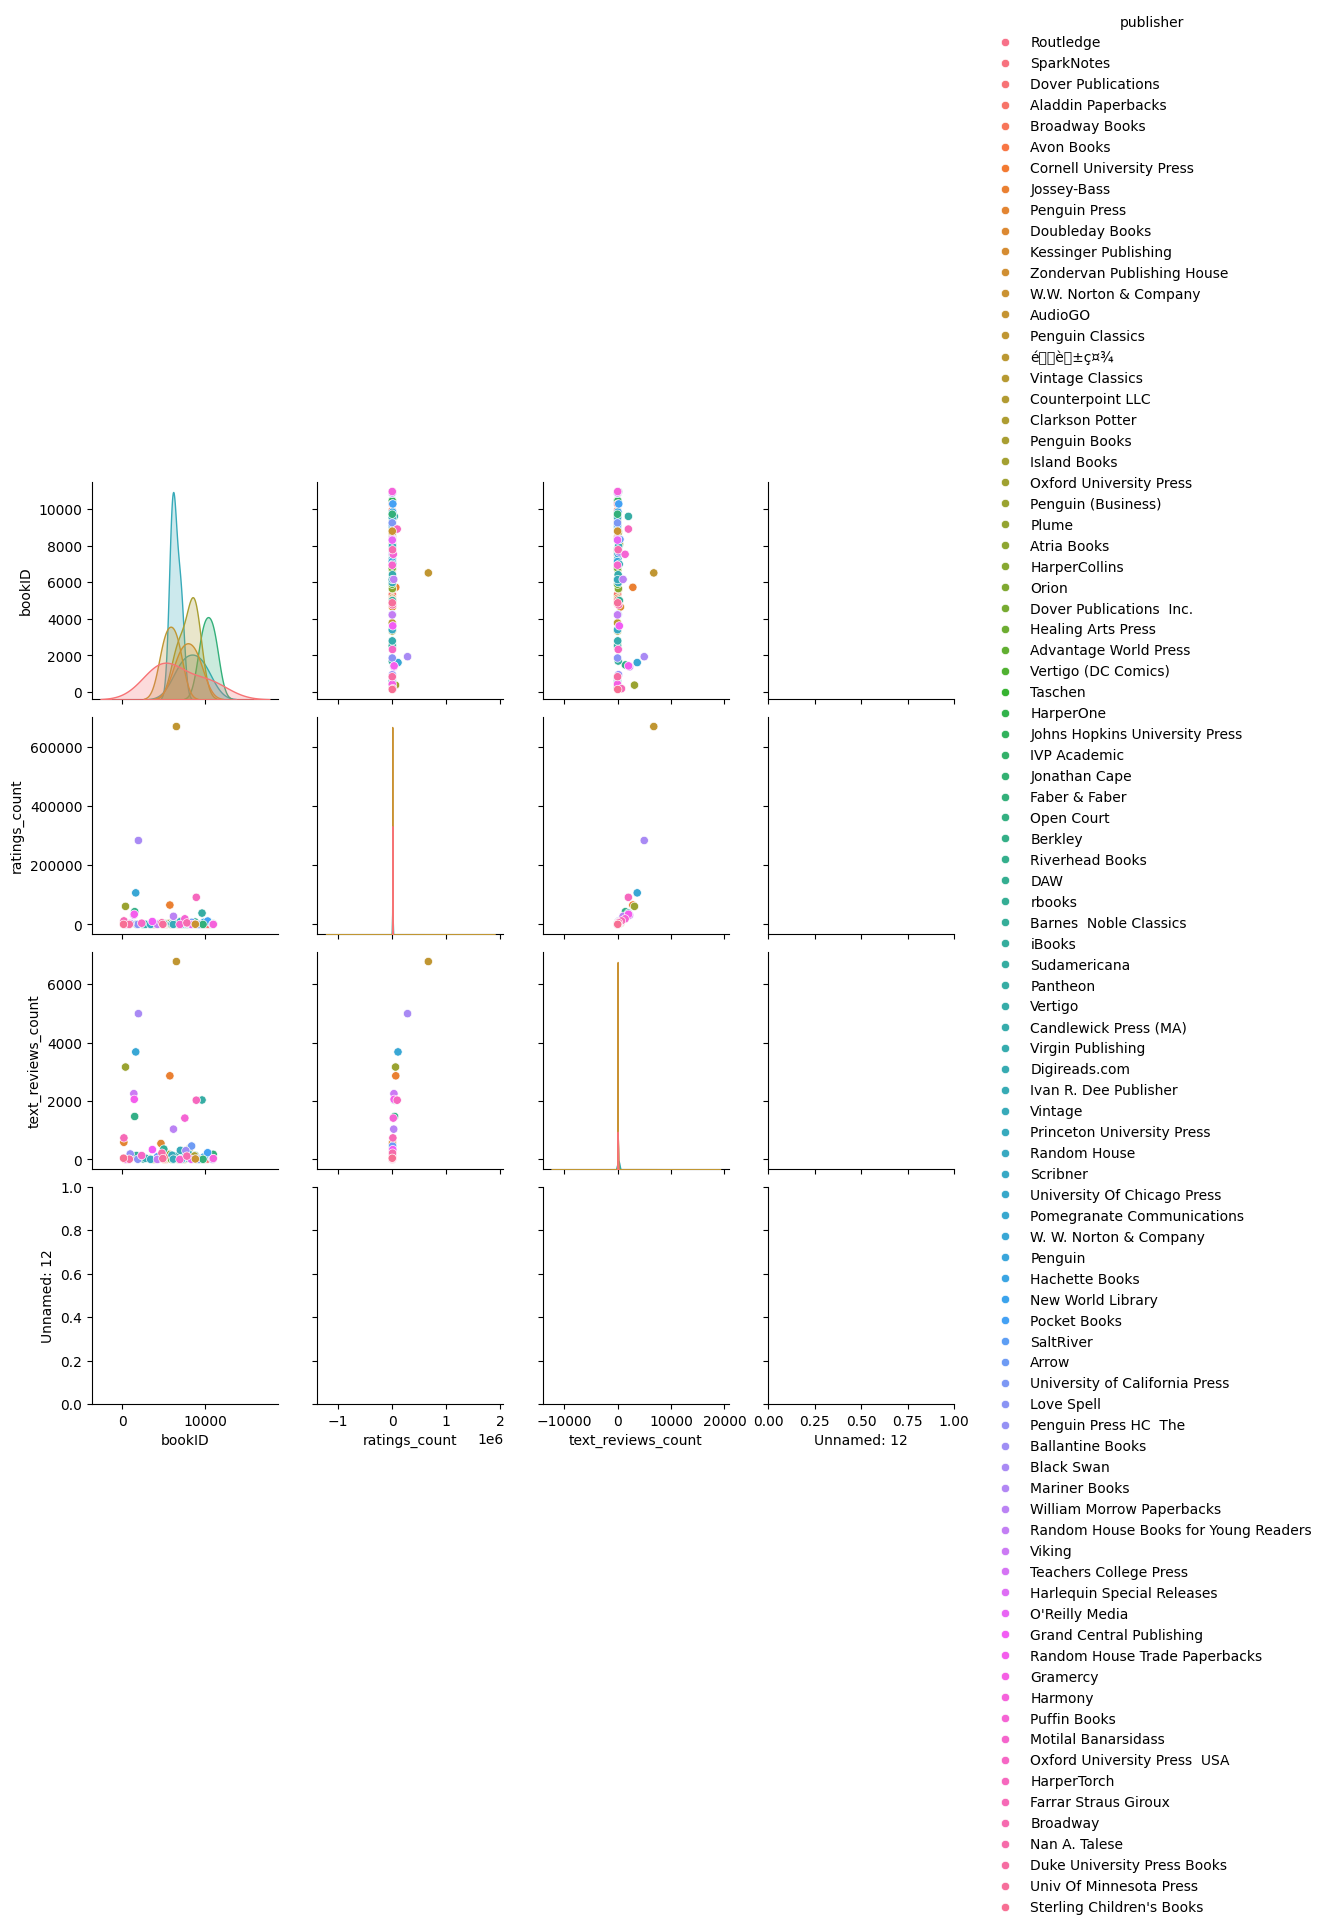

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(sample,kind="scatter", hue='publisher')
plt.show()

In [ ]:
def combine_col(data):
  features=[]
  for i in range(0, data.shape[0]):
    features.append( data['title'][i]+" "+data['authors'][i]+" "+data['average_rating'][i]+" "+data['publisher'][i])

  return features

In [ ]:
df['combine_col']=combine_col(df)
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12,combine_col
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,439785960,9.78E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN,Harry Potter and the Half-Blood Prince (Harry ...
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,439358078,9.78E+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.,NaN,Harry Potter and the Order of the Phoenix (Har...
2,3,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78E+12,eng,352,6333,244,11-01-2003,Scholastic,NaN,Harry Potter and the Chamber of Secrets (Harry...
3,4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9.78E+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.,NaN,Harry Potter and the Prisoner of Azkaban (Harr...
4,5,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,439682584,9.78E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN,Harry Potter Boxed Set Books 1-5 (Harry Potte...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,11123,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.78E+12,eng,512,156,20,12/21/2004,Da Capo Press,NaN,Expelled from Eden: A William T. Vollmann Read...
11123,11124,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.78E+12,eng,635,783,56,12-01-1988,Penguin Books,NaN,You Bright and Risen Angels William T. Vollman...
11124,11125,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.78E+12,eng,415,820,95,08-01-1993,Penguin Books,NaN,The Ice-Shirt (Seven Dreams #1) William T. Vol...
11125,11126,Poor People,William T. Vollmann,3.72,60878827,9.78E+12,eng,434,769,139,2/27/2007,Ecco,NaN,Poor People William T. Vollmann 3.72 Ecco


In [ ]:
cm=CountVectorizer().fit_transform(df['combine_col'])

In [ ]:
cs=cosine_similarity(cm)
cs

array([[1.        , 0.78258558, 0.6882472 , ..., 0.07254763, 0.        ,
        0.        ],
       [0.78258558, 1.        , 0.74620251, ..., 0.13483997, 0.        ,
        0.        ],
       [0.6882472 , 0.74620251, 1.        , ..., 0.07905694, 0.        ,
        0.        ],
       ...,
       [0.07254763, 0.13483997, 0.07905694, ..., 1.        , 0.25819889,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.25819889, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
Title=df['title'][10]
Title

"The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy  #1)"

In [ ]:
bookID=df[df.title==Title]['bookID'].values[0]
bookID

10

In [ ]:
similarity_scores=list(enumerate(cs[bookID]))

In [ ]:
sorted_scores=sorted(similarity_scores, key=lambda x:x[1], reverse=True)
sorted_scores=sorted_scores[1:]
print(sorted_scores)

[(9, 0.9051114573693304), (2382, 0.8898984166292194), (4908, 0.8898984166292194), (8, 0.8308675641104959), (4752, 0.7977240352174658), (11, 0.7784989441615229), (2383, 0.7724872793364282), (2380, 0.761052627568143), (2378, 0.6963106238227914), (7, 0.6827887419989189), (6645, 0.678914604256241), (8652, 0.6751356017927665), (2379, 0.6227991553292184), (8127, 0.5968376775623926), (2872, 0.5330017908890261), (8651, 0.5191699914900666), (9703, 0.48247525236638356), (5991, 0.4718701056164081), (4662, 0.4643597571399105), (10390, 0.46056618647183833), (5105, 0.4526019054848144), (1224, 0.4494665749754947), (9138, 0.4494665749754947), (8569, 0.44597990047236913), (7159, 0.4377137796365057), (8802, 0.4349817982616295), (1847, 0.43452409462674085), (2863, 0.4308202184276645), (7158, 0.4308202184276645), (4984, 0.42817441928883765), (2879, 0.42424242424242425), (2313, 0.42220033092074905), (3616, 0.42220033092074905), (10332, 0.42220033092074905), (9733, 0.418717894679312), (1058, 0.4181210050035

In [ ]:
ctr=0
print("Top 10 recommended books if you like "+Title+"\n")
for item in sorted_scores:
  book_title=df[df.bookID==item[0]]['title'].values[0]
  print(ctr+1, book_title)
  ctr+=1
  if ctr>=10:
    break

Top 10 recommended books if you like The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy  #1)

1 The Ultimate Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy  #1-5)
2 Starship Titanic
3 The Dirt: Confessions of the World's Most Notorious Rock Band
4 The Ultimate Hitchhiker's Guide: Five Complete Novels and One Story (Hitchhiker's Guide to the Galaxy  #1-5)
5 From Sawdust to Stardust: The Biography of DeForest Kelley
6 The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy  #1)
7 The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy  #1)
8 So Long  and Thanks for All the Fish (Hitchhiker's Guide to the Galaxy  #4)
9 Jitterbug Perfume
10 Harry Potter Collection (Harry Potter  #1-6)


**Conclusion:**

The development and evaluation of a content-based book recommendation system have demonstrated the effectiveness of leveraging machine learning techniques to provide personalized book suggestions based on user preferences and book features. By employing content-based filtering, cosine similarity calculations, feature extraction, and evaluation metrics, the system can offer relevant and tailored book recommendations to users.